<a href="https://colab.research.google.com/github/Kala-Ayush/Data-Analysis/blob/main/Titanic_Survival_(Classification)_Ayush_Kala.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Instructions




Perform classification using the Titanic dataset (loaded for you in the setup section).


### Part I (Logistic Regression Benchmark)





Incorporate the following aspects:

  1. Data
     + Load the data.
     + Explore the data, including distributions, correlation, etc. Make plots.
     + Check for null values. Handle null values by dropping or imputing.
     + Choose target and feature(s).
     + Encode features as necessary (ordinal vs one-hot).
     + Scale / normalize features as necessary.
     + Split into train and test sets (specifically 80/20 split). Remember to use a random seed to ensure your results are reproducible.
  2. Model
    + Use a `LogisticRegression` model from sklearn (using default params for now).
    + Train the model using the training data.
    + Inspect artifacts from the training process:
      + Print the model's coefficients.
      + Inspect the coefficients by wrapping them in a pandas Series (or DataFrame for multiclass) and labeling them with their corresponding feature names, then sort them in descending order.
      + Interpret the coefficients - which features contribute most to our model's predictive ability?
  3. Evaluation
    + Make predictions for the test set.
    + Evaluate the results using sklearn classification metrics, specifically the classification report. Also report on the ROC AUC score as an additional metric. Interpret the results - how well did the model do?
    + Make a confusion matrix, using the confusion matrix function from sklearn metrics.
    + Display your confusion matrix as a heatmap, for example using plotly or matplotlib.



### Part II (Random Forest Benchmark)




Repeat Steps 2 and 3 from Part I, this time using a `RandomForestClassifier` from sklearn (using default params for now).

Compare the results from Part I and Part II. Which model performs better so far?



### Part III (Best Model)




Repeat the process for Parts I and II, but this time try to arrive at the best model possible (best Logistic Regression, as well as best Random Forest).

Use a `GridSearchCV` from sklearn to explore the hyperparameter space to find the hyperparameters that yield the best performance for each model. Specifically use ROC AUC score ("roc_auc" for binary classification or "roc_auc_ovr" for multi-class classification) as the metric / scoring function to optimize on.

Experiment with different features, engineering new features as desired and applicable, in order to improve the model's performance.

Compare the best Logistic Regression with the best Random Forest. Which is better?

Compare this best model from Part III with results from previous parts. Which model performs the best? What parameters were used to train the best model (use `model.get_params()`)?


## Data Loading


We are loading a combined version of the Titanic dataset that has been hosted on GitHub.

For more information about this dataset, consult: https://www.kaggle.com/competitions/titanic/data

In [ ]:
from pandas import read_csv

df = read_csv("https://raw.githubusercontent.com/prof-rossetti/intro-to-python/main/data/titanic-original-full.csv")
df.head()

,passenger_id,survived,pclass,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,False,3,"Braund, Mr. Owen Harris",MALE,22.0,1,0,A/5 21171,7.2500,NaN,Southampton
1,2,True,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",FEMALE,38.0,1,0,PC 17599,71.2833,C85,Cherbourg
2,3,True,3,"Heikkinen, Miss. Laina",FEMALE,26.0,0,0,STON/O2. 3101282,7.9250,NaN,Southampton
3,4,True,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",FEMALE,35.0,1,0,113803,53.1000,C123,Southampton
4,5,False,3,"Allen, Mr. William Henry",MALE,35.0,0,0,373450,8.0500,NaN,Southampton


## Data Cleaning and Exploration

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from seaborn import pairplot
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.ensemble import RandomForestClassifier


<__array_function__ internals>:180: RuntimeWarning:

Converting input from bool to <class 'numpy.uint8'> for compatibility.



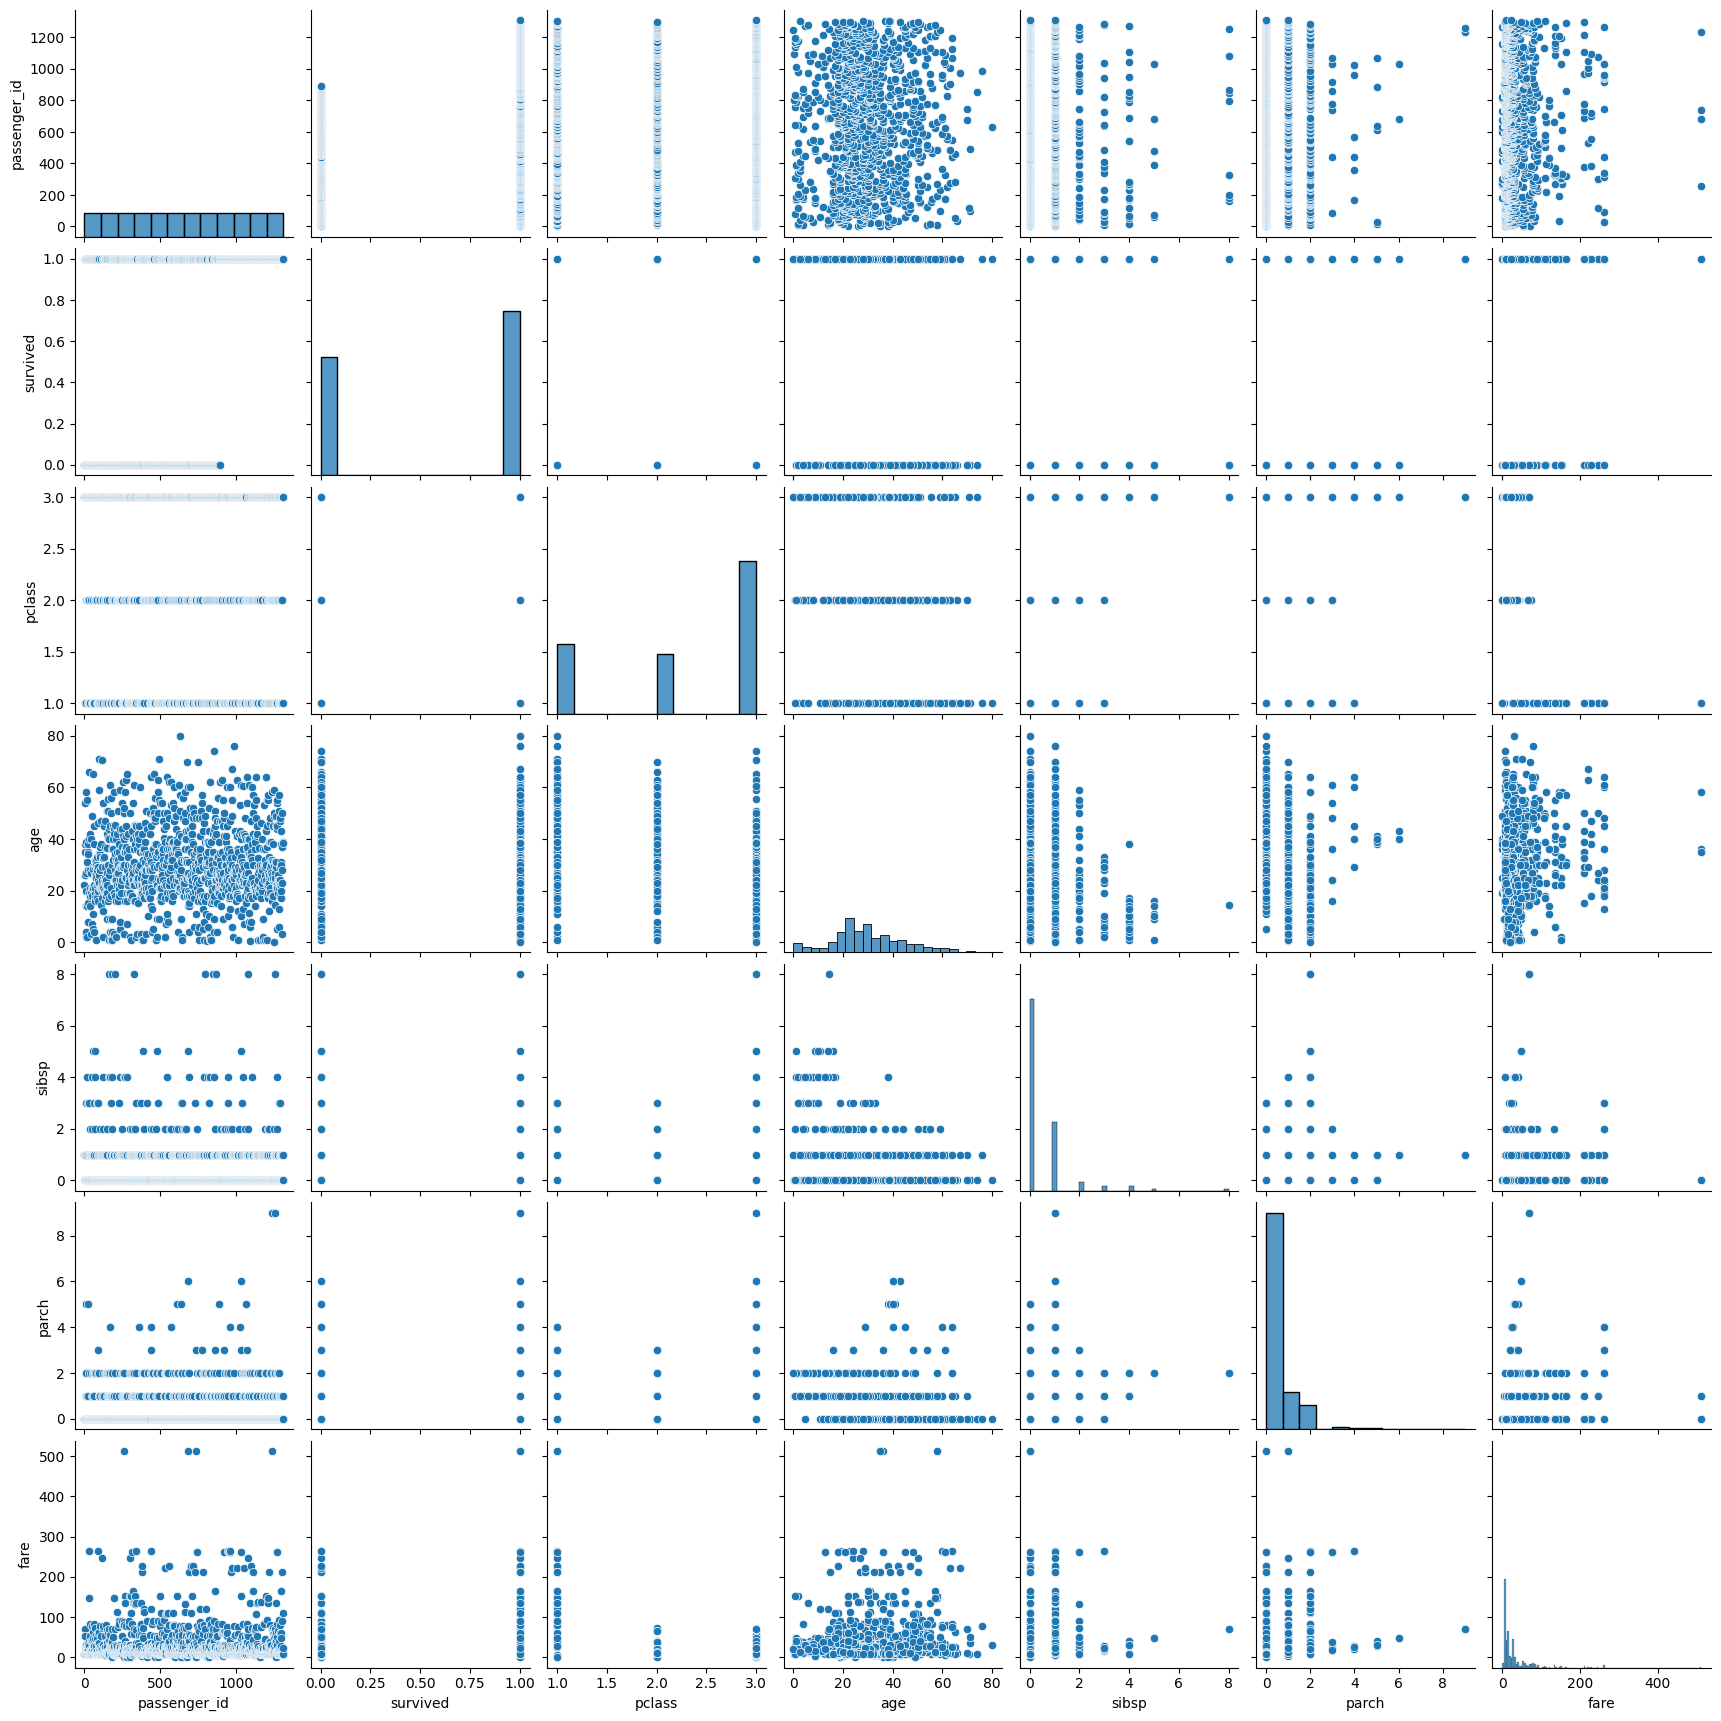

In [ ]:
sns.pairplot(df)
px.scatter(df, x="age", y="survived", color="gender", height=400)

<ipython-input-60-038fc9e360ab>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

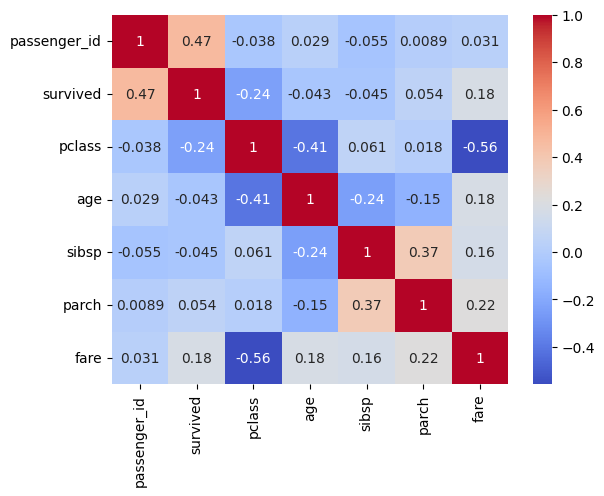

In [ ]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

In [ ]:
print(df.isnull().sum())
num_nan = df['ticket'].isna().sum()
print(f"Number of NaN values in 'ticket' column: {num_nan}")

passenger_id       0
survived           0
pclass             0
name               0
gender             0
age              263
sibsp              0
parch              0
ticket             0
fare               1
cabin           1014
embarked           2
dtype: int64
Number of NaN values in 'ticket' column: 0


In [ ]:
df.drop(columns=['cabin','ticket','name'], inplace=True)

df['age'].fillna(df['age'].mean(), inplace=True)

df.dropna(subset=['fare', 'embarked'], inplace=True)

print(df.isnull().sum())


passenger_id    0
survived        0
pclass          0
gender          0
age             0
sibsp           0
parch           0
fare            0
embarked        0
dtype: int64


In [ ]:
target_column = 'survived'
x = df.drop(columns=[target_column])
y = df[target_column]
x

,passenger_id,pclass,gender,age,sibsp,parch,fare,embarked
0,1,3,MALE,22.000000,1,0,7.2500,Southampton
1,2,1,FEMALE,38.000000,1,0,71.2833,Cherbourg
2,3,3,FEMALE,26.000000,0,0,7.9250,Southampton
3,4,1,FEMALE,35.000000,1,0,53.1000,Southampton
4,5,3,MALE,35.000000,0,0,8.0500,Southampton
...,...,...,...,...,...,...,...,...
1304,1305,3,MALE,29.881138,0,0,8.0500,Southampton
1305,1306,1,FEMALE,39.000000,0,0,108.9000,Cherbourg
1306,1307,3,MALE,38.500000,0,0,7.2500,Southampton
1307,1308,3,MALE,29.881138,0,0,8.0500,Southampton


In [ ]:
x_encoded = pd.get_dummies(x, columns=['gender', 'embarked'], drop_first=False)
x_encoded

,passenger_id,pclass,age,sibsp,parch,fare,gender_FEMALE,gender_MALE,embarked_Cherbourg,embarked_Queenstown,embarked_Southampton
0,1,3,22.000000,1,0,7.2500,0,1,0,0,1
1,2,1,38.000000,1,0,71.2833,1,0,1,0,0
2,3,3,26.000000,0,0,7.9250,1,0,0,0,1
3,4,1,35.000000,1,0,53.1000,1,0,0,0,1
4,5,3,35.000000,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,29.881138,0,0,8.0500,0,1,0,0,1
1305,1306,1,39.000000,0,0,108.9000,1,0,1,0,0
1306,1307,3,38.500000,0,0,7.2500,0,1,0,0,1
1307,1308,3,29.881138,0,0,8.0500,0,1,0,0,1


In [ ]:
x_scaled = (x_encoded - x_encoded.mean(axis=0)) / x_encoded.std(axis=0)
x_scaled.describe()
x_scaled.head()

,passenger_id,pclass,age,sibsp,parch,fare,gender_FEMALE,gender_MALE,embarked_Cherbourg,embarked_Queenstown,embarked_Southampton
0,-1.730612,0.840675,-0.609699,0.479579,-0.445441,-0.501757,-0.742056,0.742056,-0.510312,-0.322325,0.655835
1,-1.727966,-1.548707,0.636670,0.479579,-0.445441,0.735219,1.346576,-1.346576,1.958086,-0.322325,-1.523606
2,-1.725320,0.840675,-0.298107,-0.479579,-0.445441,-0.488718,1.346576,-1.346576,-0.510312,-0.322325,0.655835
3,-1.722674,-1.548707,0.402976,0.479579,-0.445441,0.383960,1.346576,-1.346576,-0.510312,-0.322325,0.655835
4,-1.720028,0.840675,0.402976,-0.479579,-0.445441,-0.486303,-0.742056,0.742056,-0.510312,-0.322325,0.655835


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=99)
x_train

,passenger_id,pclass,age,sibsp,parch,fare,gender_FEMALE,gender_MALE,embarked_Cherbourg,embarked_Queenstown,embarked_Southampton
288,-0.968534,-0.354016,0.948263,-0.479579,-0.445441,-0.390680,-0.742056,0.742056,-0.510312,-0.322325,0.655835
260,-1.042625,0.840675,0.004226,-0.479579,-0.445441,-0.492098,-0.742056,0.742056,-0.510312,3.100084,-1.523606
148,-1.338989,-0.354016,0.519823,-0.479579,1.863075,-0.139550,-0.742056,0.742056,-0.510312,-0.322325,0.655835
135,-1.373388,-0.354016,-0.531801,-0.479579,-0.445441,-0.351160,-0.742056,0.742056,1.958086,-0.322325,-1.523606
406,-0.656293,0.840675,1.649346,-0.479579,-0.445441,-0.492098,-0.742056,0.742056,-0.510312,-0.322325,0.655835
...,...,...,...,...,...,...,...,...,...,...,...
1095,1.166874,-0.354016,-0.376005,-0.479579,-0.445441,-0.438975,-0.742056,0.742056,-0.510312,-0.322325,0.655835
1195,1.431485,0.840675,0.004226,-0.479579,-0.445441,-0.492098,1.346576,-1.346576,-0.510312,3.100084,-1.523606
1212,1.476469,0.840675,-0.376005,-0.479579,-0.445441,-0.502159,-0.742056,0.742056,1.958086,-0.322325,-1.523606
1062,1.079553,0.840675,-0.220209,-0.479579,-0.445441,-0.502240,-0.742056,0.742056,1.958086,-0.322325,-1.523606


### Part I (Logistic Regression Benchmark)


In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [ ]:
coefs = pd.Series(model.coef_[0], index=x_scaled.columns)
sorted_coefs = coefs.sort_values(ascending=False)
coefs

print("\nSorted Coefficients:")
print(sorted_coefs)
# Each coefficient represents the relationship between the corresponding feature and the target variable (survived).
# passenger_id having a high coefficient indicates that the data was probably arranged such that more passengers
# that did not survive were added to the list first and those that did were placed towards the end. The coefficients also suggest
# more women survived than men and that those that paid a higher fare also had higher chances of surviving than those that did not.
# The coefficients also suggest that younger people had a higher chance of surviving and those with a higher pclass had less chances
# of surviving.


Sorted Coefficients:
passenger_id            1.544565
gender_FEMALE           0.636739
fare                    0.124337
embarked_Cherbourg      0.101191
embarked_Queenstown     0.046584
embarked_Southampton   -0.119011
parch                  -0.159104
sibsp                  -0.296383
age                    -0.471968
gender_MALE            -0.636739
pclass                 -0.674575
dtype: float64



Classification Report:
              precision    recall  f1-score   support

       False       0.79      0.77      0.78       110
        True       0.84      0.85      0.84       152

    accuracy                           0.82       262
   macro avg       0.81      0.81      0.81       262
weighted avg       0.82      0.82      0.82       262


ROC AUC Score: 0.8107057416267942


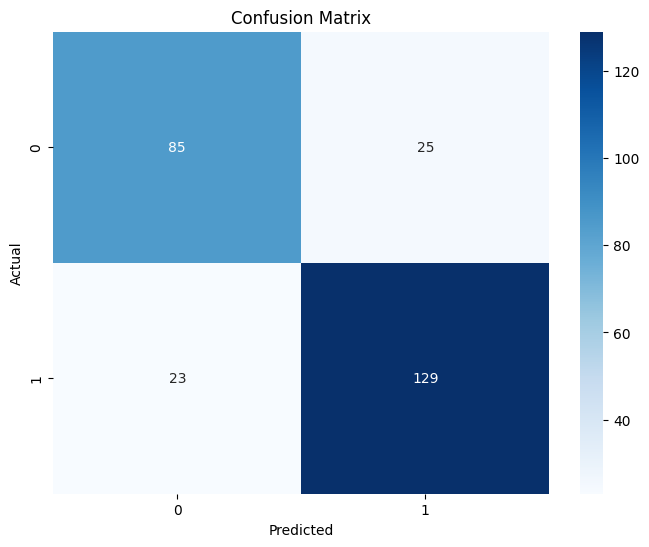

In [ ]:
y_pred = model.predict(x_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

roc_auc = roc_auc_score(y_test, y_pred)
print("\nROC AUC Score:", roc_auc)
# A ROC AUC score of 0.8107 suggests that the model has a good level of accuracy,
# with 81% probability of correctly distinguishing between the positive and negative classes.
# A score of 0.8107 is generally considered good.

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues') #consulted ChatGPT for this
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
# this represents 25 false positive results and 23 false negative results

### Part II (Random Forest Benchmark)


Random Forest Feature Importance:
passenger_id            0.487194
fare                    0.120092
age                     0.112403
gender_MALE             0.081809
gender_FEMALE           0.066151
pclass                  0.048056
sibsp                   0.030691
parch                   0.026141
embarked_Cherbourg      0.011389
embarked_Southampton    0.011115
embarked_Queenstown     0.004958
dtype: float64

Random Forest Classification Report:
              precision    recall  f1-score   support

       False       0.76      0.89      0.82       110
        True       0.91      0.80      0.85       152

    accuracy                           0.84       262
   macro avg       0.83      0.84      0.83       262
weighted avg       0.85      0.84      0.84       262

Random Forest ROC AUC Score: 0.9048444976076554


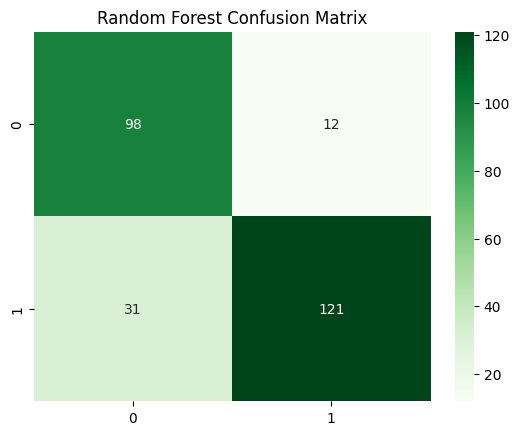

In [ ]:
forest_model = RandomForestClassifier(random_state=42)
forest_model.fit(x_train, y_train)

forest_feature_importance = pd.Series(forest_model.feature_importances_, index=x_train.columns).sort_values(ascending=False) #consulted chatGPT for this
print("\nRandom Forest Feature Importance:")
print(forest_feature_importance)
# In Random Forest, feature importances are always positive, indicating the relative
# importance of each feature for the prediction of the target variable. In this case, passenger_id,
# fare and age are the most important features for predicting our target variable.

forest_predictions = forest_model.predict(x_test)
forest_proba = forest_model.predict_proba(x_test)[:, 1]

print("\nRandom Forest Classification Report:")
print(classification_report(y_test, forest_predictions))

print("Random Forest ROC AUC Score:", roc_auc_score(y_test, forest_proba))
# A ROC AUC score of 0.9048 suggests that the model has a good level of accuracy,
# with 90% probability of correctly distinguishing between true and false values of the survived variable.
# A score of 0.9048 is considered good.

forest_conf_matrix = confusion_matrix(y_test, forest_predictions)
sns.heatmap(forest_conf_matrix, annot=True, fmt="d", cmap="Greens")
plt.title("Random Forest Confusion Matrix")
plt.show()
# this represents 12 false positive results and 31 false negative results

### Part III (Best Model)


In [ ]:
# Consulted chatGPT and professors notebook for a few sections of this part

from sklearn.model_selection import GridSearchCV

param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    "penalty": ["11", "l2"],
    "max_iter": [50, 100, 1000, 10000]
}

model_lr = LogisticRegression()

gs_lr = GridSearchCV(model_lr, param_grid_lr, cv=5, scoring='roc_auc', verbose=1)

gs_lr.fit(x_train, y_train)

Fitting 5 folds for each of 56 candidates, totalling 280 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning:


140 fits failed out of a total of 280.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
140 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1160, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sk

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'max_iter': [50, 100, 1000, 10000],
                         'penalty': ['11', 'l2']},
             scoring='roc_auc', verbose=1)

In [ ]:
print("Best parameters for the best performing model:", gs_lr.best_estimator_.get_params())
print("Best parameters for Logistic Regression:", gs_lr.best_params_)
print("Best ROC AUC score for Logistic Regression:", gs_lr.best_score_)

Best parameters for the best performing model: {'C': 0.1, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 50, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
Best parameters for Logistic Regression: {'C': 0.1, 'max_iter': 50, 'penalty': 'l2'}
Best ROC AUC score for Logistic Regression: 0.8865281483976271


In [ ]:
# Experiment with different features, engineering new features as desired and applicable, in order to improve the model's performance.
x_scaled['sibsp_parch_ratio'] = x_scaled['sibsp'] / (x_scaled['parch'] + 1)
x_scaled['age_pclass_interaction'] = x_scaled['age'] * x_scaled['pclass']
x_scaled.head()


,passenger_id,pclass,age,sibsp,parch,fare,gender_FEMALE,gender_MALE,embarked_Cherbourg,embarked_Queenstown,embarked_Southampton,sibsp_parch_ratio,age_pclass_interaction
0,-1.730612,0.840675,-0.609699,0.479579,-0.445441,-0.501757,-0.742056,0.742056,-0.510312,-0.322325,0.655835,0.864794,-0.512559
1,-1.727966,-1.548707,0.636670,0.479579,-0.445441,0.735219,1.346576,-1.346576,1.958086,-0.322325,-1.523606,0.864794,-0.986016
2,-1.725320,0.840675,-0.298107,-0.479579,-0.445441,-0.488718,1.346576,-1.346576,-0.510312,-0.322325,0.655835,-0.864794,-0.250611
3,-1.722674,-1.548707,0.402976,0.479579,-0.445441,0.383960,1.346576,-1.346576,-0.510312,-0.322325,0.655835,0.864794,-0.624092
4,-1.720028,0.840675,0.402976,-0.479579,-0.445441,-0.486303,-0.742056,0.742056,-0.510312,-0.322325,0.655835,-0.864794,0.338772


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=99)
x_train

,passenger_id,pclass,age,sibsp,parch,fare,gender_FEMALE,gender_MALE,embarked_Cherbourg,embarked_Queenstown,embarked_Southampton,sibsp_parch_ratio,age_pclass_interaction
288,-0.968534,-0.354016,0.948263,-0.479579,-0.445441,-0.390680,-0.742056,0.742056,-0.510312,-0.322325,0.655835,-0.864794,-0.335701
260,-1.042625,0.840675,0.004226,-0.479579,-0.445441,-0.492098,-0.742056,0.742056,-0.510312,3.100084,-1.523606,-0.864794,0.003553
148,-1.338989,-0.354016,0.519823,-0.479579,1.863075,-0.139550,-0.742056,0.742056,-0.510312,-0.322325,0.655835,-0.167505,-0.184026
135,-1.373388,-0.354016,-0.531801,-0.479579,-0.445441,-0.351160,-0.742056,0.742056,1.958086,-0.322325,-1.523606,-0.864794,0.188266
406,-0.656293,0.840675,1.649346,-0.479579,-0.445441,-0.492098,-0.742056,0.742056,-0.510312,-0.322325,0.655835,-0.864794,1.386563
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,1.166874,-0.354016,-0.376005,-0.479579,-0.445441,-0.438975,-0.742056,0.742056,-0.510312,-0.322325,0.655835,-0.864794,0.133112
1195,1.431485,0.840675,0.004226,-0.479579,-0.445441,-0.492098,1.346576,-1.346576,-0.510312,3.100084,-1.523606,-0.864794,0.003553
1212,1.476469,0.840675,-0.376005,-0.479579,-0.445441,-0.502159,-0.742056,0.742056,1.958086,-0.322325,-1.523606,-0.864794,-0.316098
1062,1.079553,0.840675,-0.220209,-0.479579,-0.445441,-0.502240,-0.742056,0.742056,1.958086,-0.322325,-1.523606,-0.864794,-0.185124


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    "penalty": ["11", "l2"],
    "max_iter": [50, 100, 1000, 10000]
}

model_lr = LogisticRegression()

gs_lr = GridSearchCV(model_lr, param_grid_lr, cv=5, scoring='roc_auc', verbose=1)

gs_lr.fit(x_train, y_train)

Fitting 5 folds for each of 56 candidates, totalling 280 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning:


140 fits failed out of a total of 280.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
140 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1160, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sk

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'max_iter': [50, 100, 1000, 10000],
                         'penalty': ['11', 'l2']},
             scoring='roc_auc', verbose=1)

In [ ]:
print("Best parameters for the best performing model:", gs_lr.best_estimator_.get_params())
print("Best parameters for Logistic Regression:", gs_lr.best_params_)
print("Best ROC AUC score for Logistic Regression:", gs_lr.best_score_)
# mild improvement in best ROC AUC score after feature manipulation

Best parameters for the best performing model: {'C': 10, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 50, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
Best parameters for Logistic Regression: {'C': 10, 'max_iter': 50, 'penalty': 'l2'}
Best ROC AUC score for Logistic Regression: 0.8888339076141868


Classification Report:
              precision    recall  f1-score   support

       False       0.81      0.79      0.80       110
        True       0.85      0.86      0.86       152

    accuracy                           0.83       262
   macro avg       0.83      0.83      0.83       262
weighted avg       0.83      0.83      0.83       262



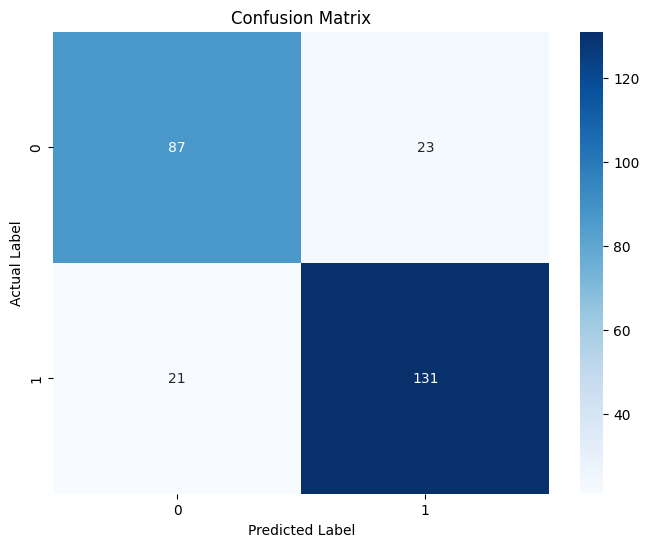

In [ ]:
y_pred = gs_lr.best_estimator_.predict(x_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

In [ ]:
param_grid_rf = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

model_rf = RandomForestClassifier(random_state=99)
gs_rf = GridSearchCV( model_rf, param_grid_rf, cv=5, scoring='roc_auc', verbose=1)

gs_rf.fit(x_train, y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=99),
             param_grid={'max_depth': [5, 10, 15, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150, 200]},
             scoring='roc_auc', verbose=1)

In [ ]:
print("Best parameters for the best performing model:", gs_rf.best_estimator_.get_params())
print("Best parameters for Random Forest:", gs_rf.best_params_)
print("Best ROC AUC score for Random Forest:", gs_rf.best_score_)

Best parameters for the best performing model: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 2, 'min_samples_split': 5, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 200, 'n_jobs': None, 'oob_score': False, 'random_state': 99, 'verbose': 0, 'warm_start': False}
Best parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Best ROC AUC score for Random Forest: 0.9426932476661743


Random Forest Classifier Classification Report:
              precision    recall  f1-score   support

       False       0.77      0.89      0.83       110
        True       0.91      0.81      0.86       152

    accuracy                           0.84       262
   macro avg       0.84      0.85      0.84       262
weighted avg       0.85      0.84      0.84       262



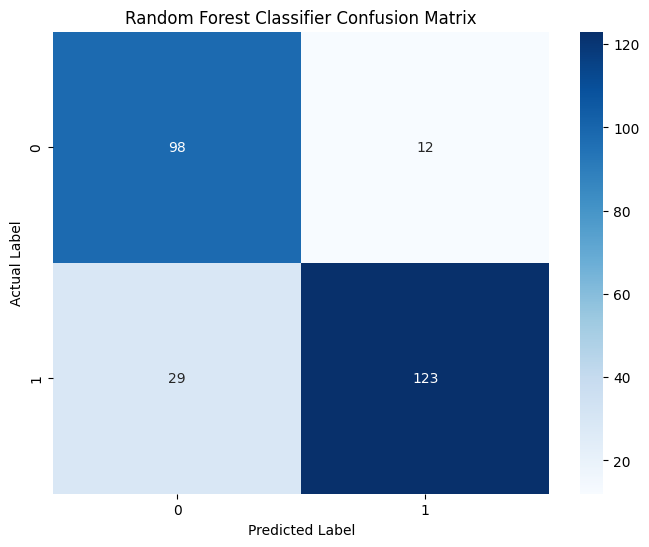

In [ ]:
y_pred_rf = gs_rf.best_estimator_.predict(x_test)

print("Random Forest Classifier Classification Report:")
print(classification_report(y_test, y_pred_rf))

conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Classifier Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

In [ ]:
print("Final comparison of models:")

y_pred_lr = gs_lr.best_estimator_.predict(x_test)
roc_auc_lr = roc_auc_score(y_test, y_pred_lr)
print("Best Logistic Regression ROC AUC Score:", roc_auc_lr)

y_pred_rf = gs_rf.best_estimator_.predict(x_test)
roc_auc_rf = roc_auc_score(y_test, y_pred_rf)
print("Best Random Forest ROC AUC Score:", roc_auc_rf)

if roc_auc_lr > roc_auc_rf:
    print("Logistic Regression is better.")
    best_model = gs_lr.best_estimator_
else:
    print("Random Forest is better.")
    best_model = gs_rf.best_estimator_

print("Parameters of the best model:")
print(best_model.get_params())

# The models built using GridSearch perform better than the models from the previous parts, producing a better ROC AUC score
# and producing less false positives/negatives.

Final comparison of models:
Best Logistic Regression ROC AUC Score: 0.8263755980861245
Best Random Forest ROC AUC Score: 0.8500598086124401
Random Forest is better.
Parameters of the best model:
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 2, 'min_samples_split': 5, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 200, 'n_jobs': None, 'oob_score': False, 'random_state': 99, 'verbose': 0, 'warm_start': False}
